In [1]:
!unzip '/content/digit-recognizer.zip'

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Approach to the problem
1. Load the Data
2. Visualize the Data
3. Apply the Models (ML, NN)
4. Evalute the model perfromance and discuss in detail
5. Move the Best Performing model to Production


# Load Data and Libraries

Load Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Standard ML Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import Perceptron # Neural Network Model

Load Data


In [3]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

Check the Data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
train.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

Cannot do anything even if we have missing data as it is Unstructured data

In [6]:
train.shape

(42000, 785)

In [7]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test.shape

(28000, 784)

In [9]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Visualize the Code
Extract data from row 3

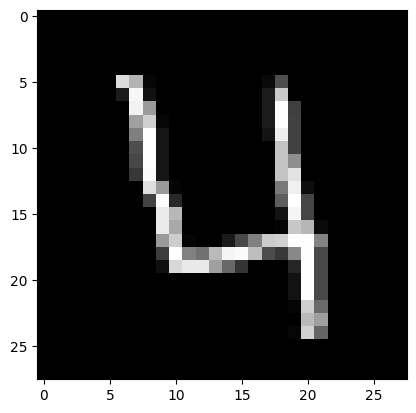

In [10]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(0, 784)]
row_to_examine = 3
image_data = np.reshape(train[features][row_to_examine:row_to_examine+1].to_numpy(), (28, 28))
_ = plt.imshow(image_data, cmap="gray")

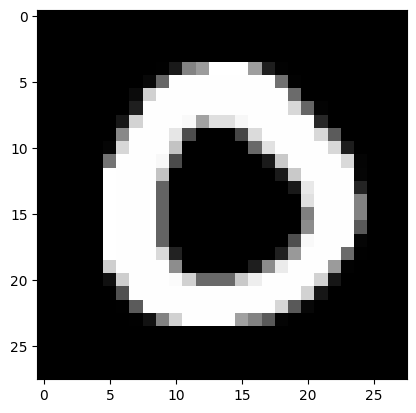

In [11]:
features1 = ["pixel{}".format(pixel_num) for pixel_num in range(0, 784)]
row_to_examine = 4
image_data = np.reshape(train[features1][row_to_examine:row_to_examine+1].to_numpy(), (28, 28))
_ = plt.imshow(image_data, cmap="gray")

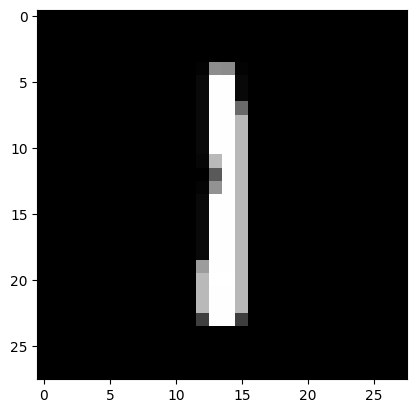

In [12]:
features2 = ["pixel{}".format(pixel_num) for pixel_num in range(0, 784)]
row_to_examine = 2
image_data = np.reshape(train[features2][row_to_examine:row_to_examine+1].to_numpy(), (28, 28))
_ = plt.imshow(image_data, cmap="gray")

# Split the Data in Train and Test

In [13]:
x = train.drop('label', axis=1)
y = train['label']

In [14]:
print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


Apply the Model

Random Forest Classifier


In [17]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_hat_train = rf.predict(x_train)
y_hat_test = rf.predict(x_test)

Evalaute the Model
Define Model Evaluation code as we run the code multiple times

In [18]:
def model_eval(actual,predicted):
  print("Accuracy_Score:", round(accuracy_score(actual, predicted),2))
  print("Confusion Matrix:\n", confusion_matrix(actual, predicted))
  print("Classification Report:\n", classification_report(actual, predicted))

In [19]:
model_eval(y_train, y_hat_train)

Accuracy_Score: 1.0
Confusion Matrix:
 [[3347    0    0    0    0    0    0    0    0    0]
 [   0 3735    0    0    0    0    0    0    0    0]
 [   0    0 3339    0    0    0    0    0    0    0]
 [   0    0    0 3493    0    0    0    0    0    0]
 [   0    0    0    0 3276    0    0    0    0    0]
 [   0    0    0    0    0 2995    0    0    0    0]
 [   0    0    0    0    0    0 3267    0    0    0]
 [   0    0    0    0    0    0    0 3541    0    0]
 [   0    0    0    0    0    0    0    0 3246    0]
 [   0    0    0    0    0    0    0    0    0 3361]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3347
           1       1.00      1.00      1.00      3735
           2       1.00      1.00      1.00      3339
           3       1.00      1.00      1.00      3493
           4       1.00      1.00      1.00      3276
           5       1.00      1.00      1.00      2995
           6       1.00    

In [20]:
model_eval(y_test,y_hat_test)

Accuracy_Score: 0.97
Confusion Matrix:
 [[774   0   1   1   1   0   3   1   4   0]
 [  0 933   6   4   1   1   2   0   2   0]
 [  2   1 812   9   1   2   2   3   4   2]
 [  1   0  12 821   0   7   0   7   7   3]
 [  2   2   0   0 771   0   2   2   6  11]
 [  3   2   1  16   1 764   6   1   5   1]
 [  2   1   0   0   2  12 852   0   1   0]
 [  1   6  11   0   6   0   0 829   1   6]
 [  3   4   2   8   4   5   6   0 777   8]
 [  6   0   3   8  14   3   0   9   6 778]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       785
           1       0.98      0.98      0.98       949
           2       0.96      0.97      0.96       838
           3       0.95      0.96      0.95       858
           4       0.96      0.97      0.97       796
           5       0.96      0.95      0.96       800
           6       0.98      0.98      0.98       870
           7       0.97      0.96      0.97       860
           8      

Model Performance is not upto the mark as we have low precision and recall values

Running Perceptron


In [21]:
per = Perceptron(verbose = 1)
per.fit(x_train, y_train)
per_y_hat_train = per.predict(x_train)
per_y_hat_test = per.predict(x_test)

-- Epoch 1
Norm: 33680.40, NNZs: 599, Bias: -92.000000, T: 33600, Avg. loss: 46817.951667
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 42819.49, NNZs: 607, Bias: -161.000000, T: 67200, Avg. loss: 41184.869077
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 48607.75, NNZs: 614, Bias: -222.000000, T: 100800, Avg. loss: 36891.702232
Total training time: 0.15 seconds.
-- Epoch 4
Norm: 54442.08, NNZs: 625, Bias: -281.000000, T: 134400, Avg. loss: 35999.461042
Total training time: 0.20 seconds.
-- Epoch 5
Norm: 58608.01, NNZs: 631, Bias: -333.000000, T: 168000, Avg. loss: 37009.589702
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 61946.25, NNZs: 635, Bias: -383.000000, T: 201600, Avg. loss: 34799.316220
Total training time: 0.31 seconds.
-- Epoch 7
Norm: 65207.63, NNZs: 637, Bias: -432.000000, T: 235200, Avg. loss: 36238.479613
Total training time: 0.36 seconds.
-- Epoch 8
Norm: 68995.89, NNZs: 639, Bias: -476.000000, T: 268800, Avg. loss: 34062.205625
Total training time: 0

In [22]:
per.n_iter_

27

In [23]:
per = Perceptron(verbose = 0)
per.fit(x_train, y_train)
per_y_hat_train = per.predict(x_train)
per_y_hat_test = per.predict(x_test)

Model Evaluation - Single layer Perceptron

In [24]:
model_eval(y_test,per_y_hat_test)

Accuracy_Score: 0.87
Confusion Matrix:
 [[741   1   4   0   0  10  22   0   7   0]
 [  0 895   8   6   1   3   2   0  34   0]
 [  4   3 710  28   2   9  18   4  59   1]
 [  6   2  23 742   2  38   4   5  28   8]
 [  5   6  33   2 689   2  12   6  28  13]
 [ 12   5   4  38   3 654  21   1  58   4]
 [  3   1  12   0   0  18 823   1  12   0]
 [  4   5  32   1   2   6   0 781  15  14]
 [  6  11  15   8   2  25  10   5 732   3]
 [  5   2  37  14  62  30   0  85  82 510]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       785
           1       0.96      0.94      0.95       949
           2       0.81      0.85      0.83       838
           3       0.88      0.86      0.87       858
           4       0.90      0.87      0.88       796
           5       0.82      0.82      0.82       800
           6       0.90      0.95      0.92       870
           7       0.88      0.91      0.89       860
           8      

In [25]:
model_eval(y_train,per_y_hat_train)

Accuracy_Score: 0.89
Confusion Matrix:
 [[3197    0   14    5    2   31   70    1   25    2]
 [   1 3556   20    9    2    5    4    4  130    4]
 [  18    9 2961   70    9   24   34   16  193    5]
 [  19   10   83 3022    1  142   27   16  152   21]
 [   5    8  123   17 2912   19   38   17  103   34]
 [  27    3   16   78   19 2525   96    7  194   30]
 [  13    5   28    3    5   45 3122    0   46    0]
 [   7    6  134   17    7    7    6 3269   40   48]
 [  18   20   38   53    8   92   17   10 2978   12]
 [  19   15  120   63  188  119    8  298  309 2222]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3347
           1       0.98      0.95      0.97      3735
           2       0.84      0.89      0.86      3339
           3       0.91      0.87      0.88      3493
           4       0.92      0.89      0.91      3276
           5       0.84      0.84      0.84      2995
           6       0.91   

In [27]:
from sklearn.neural_network import MLPClassifier

In [29]:
mlp = MLPClassifier(hidden_layer_sizes=(64,64,64),verbose=True)

In [30]:
mlp.fit(x_train,y_train)
y_hat_train_mlp= mlp.predict(x_train)
y_hat_test_mlp= mlp.predict(x_test)

Iteration 1, loss = 3.23911433
Iteration 2, loss = 0.64759819
Iteration 3, loss = 0.42991978
Iteration 4, loss = 0.32232438
Iteration 5, loss = 0.26053084
Iteration 6, loss = 0.21425576
Iteration 7, loss = 0.18521663
Iteration 8, loss = 0.15825000
Iteration 9, loss = 0.13912688
Iteration 10, loss = 0.12480366
Iteration 11, loss = 0.11245684
Iteration 12, loss = 0.10749316
Iteration 13, loss = 0.09368098
Iteration 14, loss = 0.09134326
Iteration 15, loss = 0.08753015
Iteration 16, loss = 0.08488136
Iteration 17, loss = 0.07149207
Iteration 18, loss = 0.07864802
Iteration 19, loss = 0.07542507
Iteration 20, loss = 0.07719572
Iteration 21, loss = 0.07092825
Iteration 22, loss = 0.06359366
Iteration 23, loss = 0.06442317
Iteration 24, loss = 0.06632145
Iteration 25, loss = 0.05966908
Iteration 26, loss = 0.05669413
Iteration 27, loss = 0.06253371
Iteration 28, loss = 0.05977744
Iteration 29, loss = 0.04237534
Iteration 30, loss = 0.06276305
Iteration 31, loss = 0.05511750
Iteration 32, los

In [31]:
model_eval(y_test,y_hat_test_mlp)

Accuracy_Score: 0.96
Confusion Matrix:
 [[771   0   2   0   3   3   1   1   2   2]
 [  0 932   5   2   2   0   3   0   4   1]
 [  4   2 797  10   3   1   3   8   7   3]
 [  3   0  10 818   0   9   1   5   7   5]
 [  1   2   0   0 772   1   6   2   2  10]
 [  4   0   0  15   3 761   9   1   6   1]
 [ 11   1   1   0   3   4 849   0   1   0]
 [  1   1   8   1   5   2   0 836   2   4]
 [  4   2   3   6   3   5   8   2 775   9]
 [  1   0   1   5  24   5   0  16   4 771]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       785
           1       0.99      0.98      0.99       949
           2       0.96      0.95      0.96       838
           3       0.95      0.95      0.95       858
           4       0.94      0.97      0.96       796
           5       0.96      0.95      0.96       800
           6       0.96      0.98      0.97       870
           7       0.96      0.97      0.97       860
           8      

In [32]:
model_eval(y_train,y_hat_train_mlp)

Accuracy_Score: 1.0
Confusion Matrix:
 [[3333    0    0    0    2    2    0    0    7    3]
 [   0 3734    0    0    1    0    0    0    0    0]
 [   6    0 3320    0    1    1    2    8    1    0]
 [   1    0    2 3477    0    1    0    0    4    8]
 [   0    0    0    0 3275    0    1    0    0    0]
 [   1    0    0    0    0 2992    1    0    1    0]
 [  11    0    0    0    3    0 3253    0    0    0]
 [   1    0    0    0    0    0    0 3540    0    0]
 [   1    0    1    1    1    0    2    0 3238    2]
 [   1    0    0    1    7    1    0   13    2 3336]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3347
           1       1.00      1.00      1.00      3735
           2       1.00      0.99      1.00      3339
           3       1.00      1.00      1.00      3493
           4       1.00      1.00      1.00      3276
           5       1.00      1.00      1.00      2995
           6       1.00    

Running the code with 128 * 128 * 128 neurons


In [33]:
mlp1 = MLPClassifier(hidden_layer_sizes=(128,128,128),verbose=True)

In [34]:
mlp1.fit(x_train,y_train)
y_hat_train_mlp= mlp1.predict(x_train)
y_hat_test_mlp= mlp1.predict(x_test)

Iteration 1, loss = 2.72586318
Iteration 2, loss = 0.51767432
Iteration 3, loss = 0.28850206
Iteration 4, loss = 0.18347912
Iteration 5, loss = 0.13477091
Iteration 6, loss = 0.09217893
Iteration 7, loss = 0.07021869
Iteration 8, loss = 0.05540572
Iteration 9, loss = 0.04550870
Iteration 10, loss = 0.03858456
Iteration 11, loss = 0.04260951
Iteration 12, loss = 0.04735784
Iteration 13, loss = 0.05854110
Iteration 14, loss = 0.08853445
Iteration 15, loss = 0.07840897
Iteration 16, loss = 0.05560488
Iteration 17, loss = 0.05131428
Iteration 18, loss = 0.05362010
Iteration 19, loss = 0.05201388
Iteration 20, loss = 0.04548413
Iteration 21, loss = 0.05396741
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
